In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from textwrap import wrap

In [2]:
#Loading the dataset
inspectionDF = pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results_20231101.csv", sep=",", header=0)
inspectionDF.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50142355,TADA NOODLES,Manhattan,42,WEST 42 STREET,10036.0,6464709424,NaN,01/01/1900,NaN,...,NaN,40.754068,-73.982321,105.0,4.0,8400.0,1085593.0,1.012570e+09,MN17,NaN
1,50078853,CHRISTMAS IN THE CITY,Manhattan,142,MULBERRY STREET,10013.0,5165676187,Coffee/Tea,09/13/2019,No violations were recorded at the time of thi...,...,Inter-Agency Task Force / Initial Inspection,40.718723,-73.997583,102.0,1.0,4100.0,1003088.0,1.002370e+09,MN24,NaN
2,50107039,GREEN CAFE & JUICE BAR,Brooklyn,81,CEDAR STREET,11221.0,7185814738,NaN,01/01/1900,NaN,...,NaN,40.697660,-73.926615,304.0,34.0,42300.0,3073400.0,3.032270e+09,BK78,NaN
3,50141764,NaN,Manhattan,84,NAGLE AVENUE,10040.0,6466838958,NaN,01/01/1900,NaN,...,NaN,40.860422,-73.927942,112.0,10.0,28500.0,1076759.0,1.021740e+09,MN35,NaN
4,50131498,PRINCIPE,Manhattan,450,WEST BROADWAY,10012.0,9172174441,NaN,01/01/1900,NaN,...,NaN,40.726046,-74.000675,102.0,1.0,4900.0,1087556.0,1.005160e+09,MN24,NaN


# Pre-processing 

In [3]:
# Check for missing values
inspectionDF.isna().sum()

CAMIS                         0
DBA                         534
BORO                          0
BUILDING                    355
STREET                        7
ZIPCODE                    2677
PHONE                         8
CUISINE DESCRIPTION        2340
INSPECTION DATE               0
ACTION                     2340
VIOLATION CODE             3492
VIOLATION DESCRIPTION      3492
CRITICAL FLAG                 0
SCORE                      9766
GRADE                    105975
GRADE DATE               114629
RECORD DATE                   0
INSPECTION TYPE            2340
Latitude                    261
Longitude                   261
Community Board            3251
Council District           3255
Census Tract               3255
BIN                        4237
BBL                         581
NTA                        3251
Location Point1          208184
dtype: int64

In [4]:
inspectionDF[inspectionDF['INSPECTION DATE']== '01/01/1900']

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50142355,TADA NOODLES,Manhattan,42,WEST 42 STREET,10036.0,6464709424,NaN,01/01/1900,NaN,...,NaN,40.754068,-73.982321,105.0,4.0,8400.0,1085593.0,1.012570e+09,MN17,NaN
2,50107039,GREEN CAFE & JUICE BAR,Brooklyn,81,CEDAR STREET,11221.0,7185814738,NaN,01/01/1900,NaN,...,NaN,40.697660,-73.926615,304.0,34.0,42300.0,3073400.0,3.032270e+09,BK78,NaN
3,50141764,NaN,Manhattan,84,NAGLE AVENUE,10040.0,6466838958,NaN,01/01/1900,NaN,...,NaN,40.860422,-73.927942,112.0,10.0,28500.0,1076759.0,1.021740e+09,MN35,NaN
4,50131498,PRINCIPE,Manhattan,450,WEST BROADWAY,10012.0,9172174441,NaN,01/01/1900,NaN,...,NaN,40.726046,-74.000675,102.0,1.0,4900.0,1087556.0,1.005160e+09,MN24,NaN
5,50143561,UBS EMA CAFÉ,Manhattan,11,MADISON AVENUE,10010.0,7043285231,NaN,01/01/1900,NaN,...,NaN,40.741610,-73.987449,105.0,2.0,5600.0,1088910.0,1.008548e+09,MN13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207766,50105583,MD ISLAM,Bronx,399,EAST 149 STREET,10455.0,6315681643,NaN,01/01/1900,NaN,...,NaN,40.816168,-73.918048,201.0,17.0,6500.0,2000859.0,2.023280e+09,BX34,NaN
207776,50113223,UPTACO,Manhattan,2191,3 AVENUE,10035.0,9147152599,NaN,01/01/1900,NaN,...,NaN,40.800168,-73.938370,111.0,8.0,19400.0,1054554.0,1.017840e+09,MN34,NaN
207920,50138422,Bronxlandia,Bronx,910,HUNTS POINT AVENUE,10474.0,9175335540,NaN,01/01/1900,NaN,...,NaN,40.819773,-73.890155,202.0,17.0,11502.0,2006003.0,2.027410e+09,BX27,NaN
207926,50123274,K & L MANOR,Brooklyn,4501,GLENWOOD ROAD,11203.0,3479017828,NaN,01/01/1900,NaN,...,NaN,40.634894,-73.933292,317.0,45.0,83600.0,3258897.0,3.050220e+09,BK91,NaN


In [5]:
#dropping rows with null restaurant names and violation code
inspectionDF = inspectionDF.dropna(subset = 'DBA')

inspectionDF.isna().sum()


CAMIS                         0
DBA                           0
BORO                          0
BUILDING                    349
STREET                        2
ZIPCODE                    2663
PHONE                         7
CUISINE DESCRIPTION        1810
INSPECTION DATE               0
ACTION                     1810
VIOLATION CODE             2962
VIOLATION DESCRIPTION      2962
CRITICAL FLAG                 0
SCORE                      9236
GRADE                    105445
GRADE DATE               114095
RECORD DATE                   0
INSPECTION TYPE            1810
Latitude                    248
Longitude                   248
Community Board            3229
Council District           3233
Census Tract               3233
BIN                        4207
BBL                         568
NTA                        3229
Location Point1          207650
dtype: int64

In [6]:
inspectionDF[inspectionDF['INSPECTION DATE']== '01/01/1900']

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50142355,TADA NOODLES,Manhattan,42,WEST 42 STREET,10036.0,6464709424,NaN,01/01/1900,NaN,...,NaN,40.754068,-73.982321,105.0,4.0,8400.0,1085593.0,1.012570e+09,MN17,NaN
2,50107039,GREEN CAFE & JUICE BAR,Brooklyn,81,CEDAR STREET,11221.0,7185814738,NaN,01/01/1900,NaN,...,NaN,40.697660,-73.926615,304.0,34.0,42300.0,3073400.0,3.032270e+09,BK78,NaN
4,50131498,PRINCIPE,Manhattan,450,WEST BROADWAY,10012.0,9172174441,NaN,01/01/1900,NaN,...,NaN,40.726046,-74.000675,102.0,1.0,4900.0,1087556.0,1.005160e+09,MN24,NaN
5,50143561,UBS EMA CAFÉ,Manhattan,11,MADISON AVENUE,10010.0,7043285231,NaN,01/01/1900,NaN,...,NaN,40.741610,-73.987449,105.0,2.0,5600.0,1088910.0,1.008548e+09,MN13,NaN
6,50137387,ROCKMEISHA,Manhattan,351,EAST 14 STREET,10003.0,9176757192,NaN,01/01/1900,NaN,...,NaN,40.731495,-73.982901,106.0,2.0,4800.0,1082155.0,1.009210e+09,MN21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207353,50128583,"MIKA'S DUMPLINGS, JACKY'S FRIED, NICK'S RICE B...",Queens,4005,SKILLMAN AVE,11104.0,9175261879,NaN,01/01/1900,NaN,...,NaN,40.747196,-73.923417,402.0,26.0,17100.0,4002375.0,4.001830e+09,QN31,NaN
207766,50105583,MD ISLAM,Bronx,399,EAST 149 STREET,10455.0,6315681643,NaN,01/01/1900,NaN,...,NaN,40.816168,-73.918048,201.0,17.0,6500.0,2000859.0,2.023280e+09,BX34,NaN
207776,50113223,UPTACO,Manhattan,2191,3 AVENUE,10035.0,9147152599,NaN,01/01/1900,NaN,...,NaN,40.800168,-73.938370,111.0,8.0,19400.0,1054554.0,1.017840e+09,MN34,NaN
207920,50138422,Bronxlandia,Bronx,910,HUNTS POINT AVENUE,10474.0,9175335540,NaN,01/01/1900,NaN,...,NaN,40.819773,-73.890155,202.0,17.0,11502.0,2006003.0,2.027410e+09,BX27,NaN


In [7]:
inspectionDF['STREET'].value_counts()

BROADWAY                7767
3 AVENUE                4389
5 AVENUE                3563
2 AVENUE                3224
8 AVENUE                2911
                        ... 
SAINT MARKS PL             1
PELHAM PARKWAY SOUTH       1
BEVERLY ROAD               1
65TH ST TRAVERSE           1
E TREMONT AVE              1
Name: STREET, Length: 2375, dtype: int64

In [8]:
inspectionDF[inspectionDF["BUILDING"].isnull()]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
24,50143076,CHASE AD JFK,Queens,NaN,TERMINAL 4,11430.0,2111111111,NaN,01/01/1900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344,50141787,VIP ONE,Queens,NaN,TERMINAL 1,11430.0,7187511151,NaN,01/01/1900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408,50117958,HMS HOST (Terminal B. America Airlines Club),Queens,NaN,LAGUARDIA AIRPORT,11369.0,6318064669,NaN,01/01/1900,NaN,...,NaN,40.774414,-73.877293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445,50122424,ADMIRAL'S CLUB,Queens,NaN,TERMINAL B,11371.0,7184065129,NaN,01/01/1900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,50131689,SIDE BAR,Manhattan,NaN,AMTRACK LEVEL,10001.0,2127600848,NaN,01/01/1900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205160,50000390,DUNKIN,Queens,NaN,JFK INTERNATIONAL AIRPORT,11430.0,7187514796,Coffee/Tea,06/02/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.648313,-73.788281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206218,41108575,SOHO BISTRO,Queens,NaN,JFK INTERNATIONAL AIRPORT,11430.0,7186561012,American,11/01/2017,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.648313,-73.788281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206350,50005277,PIZZA VINO,Queens,NaN,JFK INTERNATIONAL AIRPORT,11430.0,7187514800,Pizza,11/14/2019,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.648313,-73.788281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207271,50118708,STARBUCKS RESERVE,Queens,NaN,TERMINAL C HEADHOUSE LEVEL 3,11371.0,2159970667,Coffee/Tea,10/26/2022,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
inspectionDF["STREET"].value_counts()

BROADWAY                7767
3 AVENUE                4389
5 AVENUE                3563
2 AVENUE                3224
8 AVENUE                2911
                        ... 
SAINT MARKS PL             1
PELHAM PARKWAY SOUTH       1
BEVERLY ROAD               1
65TH ST TRAVERSE           1
E TREMONT AVE              1
Name: STREET, Length: 2375, dtype: int64

In [10]:
street_counts = inspectionDF["STREET"].value_counts()

filtered_df = inspectionDF[inspectionDF["STREET"].map(street_counts) == 1]

filtered_df

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
24,50143076,CHASE AD JFK,Queens,NaN,TERMINAL 4,11430.0,2111111111,NaN,01/01/1900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,50138754,Phase Surf,Queens,189,BEACH 96 STREET,11693.0,7203823013,NaN,01/01/1900,NaN,...,NaN,40.584874,-73.817793,414.0,32.0,94201.0,4303793.0,4.161690e+09,QN10,NaN
188,50134849,DELTA SKY CLUB,Queens,4,Terminal Concourse A JFK International,11430.0,4047142047,NaN,01/01/1900,NaN,...,NaN,40.648313,-73.788281,483.0,31.0,71600.0,4000000.0,4.142600e+09,QN98,NaN
203,50118360,NANA'S WONDERLAND,Queens,4507,248TH ST,11362.0,9174965332,NaN,01/01/1900,NaN,...,NaN,40.766709,-73.739081,411.0,19.0,150701.0,4170636.0,4.082140e+09,QN45,NaN
204,50131285,ARTEL 535,Brooklyn,535,VAN BUREN ST,11221.0,9294688684,NaN,01/01/1900,NaN,...,NaN,40.691875,-73.927487,303.0,41.0,38700.0,NaN,3.000000e+00,BK35,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206241,41631052,ONE STOP BEER SHOP,Brooklyn,134,KINGSLAND AVENUE,11222.0,7185990128,American,02/08/2023,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.720991,-73.940875,301.0,34.0,44900.0,3069850.0,3.028340e+09,BK90,NaN
206879,50140041,ISLAND ROOTS JUICE BAR & CAFE,Brooklyn,361,E 52ND ST,11203.0,3472527953,NaN,01/01/1900,NaN,...,NaN,40.651730,-73.928417,317.0,45.0,86200.0,NaN,3.000000e+00,BK96,NaN
206983,50101317,THE FLO KISS,Manhattan,1802,65TH STREET TRANVERSE,NaN,6466453020,NaN,01/01/1900,NaN,...,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN
207271,50118708,STARBUCKS RESERVE,Queens,NaN,TERMINAL C HEADHOUSE LEVEL 3,11371.0,2159970667,Coffee/Tea,10/26/2022,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# airport_keywords = ['Terminal', 'Airport']

# # Fill NaN values in "STREET" column with a placeholder
# inspectionDF['STREET'].fillna('', inplace=True)

# # Create a boolean mask for rows where "STREET" contains either "Terminal" or "Airport"
# airport_mask = inspectionDF['STREET'].str.contains('terminal|airport', case=False, regex=True)

# amtrak_mask = inspectionDF["STREET"].str.contains('Amtrak', case=False, na=False)

# # Categorize those rows as "Airport"
# inspectionDF.loc[airport_mask, 'Street Category'] = 'AIRPORT'
# inspectionDF.loc[amtrak_mask, 'Street Category'] = 'TRAIN STATION'


# #Assuming no builing number means its a cart/food truck
# inspectionDF.loc[
#     (inspectionDF['BUILDING'].isna()) & (inspectionDF['INSPECTION DATE'] != '1/1/1900'),
#     'Street Category'
# ] = 'Cart/food truck'

# #The rest are just on the street

# inspectionDF['Street Category'] = inspectionDF['Street Category'].fillna('street')

# # Display the updated DataFrame
# inspectionDF


In [11]:
pd.set_option('display.max_rows', None)
top_80_values_counts = inspectionDF['DBA'].value_counts().head(300)
print(top_80_values_counts)

DUNKIN                                   2565
SUBWAY                                   1506
STARBUCKS                                1171
MCDONALD'S                               1050
KENNEDY FRIED CHICKEN                     703
POPEYES                                   678
BURGER KING                               615
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     505
CROWN FRIED CHICKEN                       453
CHIPOTLE MEXICAN GRILL                    438
DUNKIN'                                   417
DOMINO'S                                  408
DUNKIN',' BASKIN ROBBINS                  377
WENDY'S                                   334
KFC                                       299
TACO BELL                                 270
PAPA JOHN'S                               258
JOE & THE JUICE                           256
CARVEL                                    247
BLUESTONE LANE                            240
IHOP                                      221
WINGSTOP                          

In [12]:
#converting a new column if they have more than 45 restaurant into franchise business or not


franchise_keywords = ['DUNKIN', 'SUBWAY', 'STARBUCKS', "MCDONALD'S", 'KENNEDY FRIED CHICKEN', 'POPEYES',
                      'BURGER KING', 'GOLDEN KRUST CARIBBEAN BAKERY & GRILL', 'CROWN FRIED CHICKEN',
                      'CHIPOTLE MEXICAN GRILL', 'DUNKIN\'', 'DOMINO\'S', 'DUNKIN\', BASKIN ROBBINS', 'WENDY\'S',
                      'KFC', 'TACO BELL', 'PAPA JOHN\'S', 'JOE & THE JUICE', 'CARVEL', 'BLUESTONE LANE',
                      'IHOP', 'WINGSTOP', 'LE PAIN QUOTIDIEN', 'PARIS BAGUETTE', 'VIVI BUBBLE TEA',
                      'PAPA JOHN\'S PIZZA', '787 COFFEE', 'DUNKIN\', BASKIN ROBBINS', 'PRET A MANGER', 'CHECKERS',
                      'SWEETGREEN', 'MAMAN', 'SHAKE SHACK', 'GONG CHA', 'JUST SALAD', 'KUNG FU TEA', 'WHITE CASTLE',
                      'HOMEMADE TAQUERIA', 'STARBUCKS COFFEE', 'VAN LEEUWEN ICE CREAM', 'DUNKIN\', \'BASKIN ROBBINS',
                      'DOMINOS', 'MOGE TEE', 'INSOMNIA COOKIES', 'TEXAS CHICKEN & BURGERS', 'BOSTON MARKET',
                      'FAY DA BAKERY', 'PLAYA BOWLS', 'LITTLE ITALY PIZZA', 'DUNKIN DONUTS', 'BLUE BOTTLE COFFEE',
                      'BAREBURGER', 'HAPPY GARDEN', 'FIVE GUYS FAMOUS BURGERS AND FRIES', 'LITTLE CAESARS',
                      'JUICY KING CRAB EXPRESS', 'GREGORYS COFFEE', 'CHOP\'T', 'JOE\'S PIZZA', 'BAYA BAR',
                      'JOE COFFEE', 'T-SWIRL CREPE', 'PANERA BREAD', 'ATOMIC WINGS', 'DIG INN', 'THINK COFFEE',
                      'MASTER WOK', 'TASTE OF CHINA', 'POPEYES LOUISIANA KITCHEN', 'JUICE PRESS', 'SHANGHAI YOU GARDEN',
                      'BLANK STREET COFFEE', 'HALAL MUNCHIES', 'CAVA', 'PIZZA HUT', 'APPLEBEE\'S', 'MAD FOR CHICKEN',
                      'LENWICH', 'DALLAS BBQ', 'SPICE', 'AU BON PAIN', 'DOS TOROS', 'COCO FRESH TEA & JUICE',
                      'POETICA COFFEE', 'DAVIDOVICH BAKERY', 'KING WOK', 'MATTO ESPRESSO', 'JIMBO\'S HAMBURGER PALACE',
                      'PELICANA CHICKEN', 'BLANK STREET', 'JOE COFFEE COMPANY', 'AUNTIE ANNE\'S PRETZELS',
                      'RIKO PERUVIAN CUISINE', 'PANDA EXPRESS', 'AMC THEATRES', 'GREGORY\'S COFFEE', 'KENNEDY CHICKEN',
                      'OMONIA CAFE', 'NO. 1 CHINESE RESTAURANT', 'BB JUICE BAR', 'CHA CHA MATCHA', 'CHAMPION PIZZA',
                      'LA ISLA RESTAURANT', 'CHIRPING CHICKEN', 'CHICK-FIL-A', 'TOUS LES JOURS', 'DON POLLO',
                      'JUICE GENERATION', 'FRESH & CO', 'OAKBERRY', 'TIKKA INDIAN GRILL', 'OSLO COFFEE ROASTERS',
                      'LA BAGEL DELIGHT', '3 TIMES', 'COLD STONE CREAMERY', 'TACOMBI', 'LA COLOMBE', 'SUN SAI GAI RESTAURANT',
                      'WOLFNIGHTS', 'LA BAGUETTE SHOP', 'YUMMY TACO', 'STARBUCKS COFFEE COMPANY', 'EL VIEJO YAYO',
                      'HAN DYNASTY', 'EMPANADAS MONUMENTAL', 'BUFFALO WILD WINGS', 'CROWN FRIED CHICKEN & PIZZA',
                      'NAPOLI PIZZA', 'CARIDAD RESTAURANT', 'TULCINGO RESTAURANT', 'ARTICHOKE BASILLE\'S PIZZA',
                      'ROSA\'S PIZZA', 'WU\'S WONTON KING', 'OUTBACK STEAKHOUSE', 'TWO HANDS', 'FUJI JAPANESE CUISINE',
                      'BRAVO PIZZA', 'KENNEDY CHICKEN & GRILL', 'SWEET CHICK', 'BIG WONG RESTAURANT', 'RED LOBSTER',
                      'BETTER GOURMET HEALTH KITCHEN', 'CINNABON', 'MEE SUM CAFE', 'JAMAICAN FLAVORS', 'CHINA DRAGON',
                      'VANILLA CAFE', 'SWEETS BAKERY', 'KORONET PIZZA', 'GREAT WALL', 'BIRCH COFFEE', '16 HANDLES',
                      'TONY\'S PIZZA', 'BAGEL BOSS', 'CHINA KING', 'TERIYAKI ONE', 'HIMALAYAN CURRY HOUSE', 'DIMSUM GARDEN',
                      'ENERGY FUEL', 'PRONTO PIZZA', 'KENNEDY FRIED CHICKEN & PIZZA', 'KRISPY KREME', 'TOMPKINS SQUARE BAGELS',
                      'OBAO', 'THE ARCH DINER', 'SAGAR CHINESE', 'DUNKIN BASKIN ROBBINS', 'NICE ONE BAKERY', 'TENZAN',
                      'LUKE\'S LOBSTER', 'PINKBERRY', '2 BROS PIZZA', 'OLE & STEEN', 'RADHUNI SWEETS & RESTAURANT',
                      'VARIETY COFFEE ROASTERS', 'CHUCK E. CHEESE\'S', 'KABAYAN FILIPINO RESTAURANT', 'THE COPPOLA CAFE',
                      'MI CASA RESTAURANT', 'MANGIA', 'GRANO DE CAFE', 'GINA LA FORNARINA', 'PIZZA D\'AMORE',
                      'YOLIE\'S BAR & RESTAURANT', 'POKE BOWL STATION', 'SARKU JAPAN', 'STICKY\'S FINGER JOINT', 'BEST DELI',
                      'GOLDEN STEAMER', 'GREAT WALL RESTAURANT', 'PAPA JOHNS PIZZA', '3 BROS 99 CENTS PIZZA',
                      'PI GREEK BAKERIE', 'FAMOUS FAMIGLIA PIZZERIA', 'MEXICUE']


# Create a new column "Franchise"
inspectionDF['Franchise'] = inspectionDF['DBA'].apply(lambda x: 'Yes' if x.upper() in franchise_keywords else 'No')

In [13]:
inspectionDF['Franchise'].value_counts()

No     181105
Yes     26545
Name: Franchise, dtype: int64

In [15]:
#Zipcode should be string values

# Convert the 'ZipCode' column to integers
inspectionDF['ZIPCODE'].fillna(0, inplace=True)
inspectionDF['ZIPCODE'] = inspectionDF['ZIPCODE'].astype(int)

# Then, convert the 'ZipCode' column to strings
inspectionDF['ZIPCODE'] = inspectionDF['ZIPCODE'].astype(str)

In [ ]:
#Checking the accuracy of the KNNimpute method
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer

#Converting categorical columns to numerical for k-NN imputation
inspectionDF['BORO'] = pd.Categorical(inspectionDF['BORO']).codes
inspectionDF['STREET'] = pd.Categorical(inspectionDF['STREET']).codes

# Replace NaNs in 'ZIPCODE' with a placeholder value (e.g., -1) to create a holdout set
df_encoded_holdout = inspectionDF.copy()
df_encoded_holdout['ZIPCODE'] = df_encoded_holdout['ZIPCODE'].fillna(-1)

# Split the data into training and holdout sets
train_data, holdout_data = train_test_split(df_encoded_holdout, test_size=0.2, random_state=42)

# Extract features for imputation
features_train = train_data.drop(columns=['ZIPCODE'])
features_holdout = holdout_data.drop(columns=['ZIPCODE'])

# Initialize k-NN imputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

# Perform imputation
imputed_zipcodes_holdout = imputer.fit(features_train).transform(features_holdout)

# Calculate accuracy score
accuracy = accuracy_score(holdout_data['ZIPCODE'], imputed_zipcodes_holdout[:, 0])

print(f"Accuracy Score: {accuracy}")

In [ ]:
#using KNNimpute to fill the zipcode missing values


#Extracting features for imputation
features = inspectionDF[['BORO', 'STREET']]

#Initializing k-NN imputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

#Performing imputation
imputed_zipcodes = imputer.fit_transform(features)

#Updating the DataFrame with imputed values
inspectionDF['ZIPCODE'] = imputed_zipcodes[:, 0].astype(int)

In [ ]:
inspectionDF['ZIPCODE'].isnull().sum()

#zipcodes are now filled

In [16]:
#dropping the columns not required for analysis or prediction
col_to_drop = ['CAMIS','BUILDING', 'PHONE', 'Community Board', 'Council District', 'Census Tract', 'BIN','BBL','NTA','Location Point1']
inspectionDF = inspectionDF.drop(columns= col_to_drop, axis=1)
inspectionDF.head()

,DBA,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Franchise
0,TADA NOODLES,Manhattan,WEST 42 STREET,10036,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/01/2023,NaN,40.754068,-73.982321,No
1,CHRISTMAS IN THE CITY,Manhattan,MULBERRY STREET,10013,Coffee/Tea,09/13/2019,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,NaN,NaN,11/01/2023,Inter-Agency Task Force / Initial Inspection,40.718723,-73.997583,No
2,GREEN CAFE & JUICE BAR,Brooklyn,CEDAR STREET,11221,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/01/2023,NaN,40.697660,-73.926615,No
4,PRINCIPE,Manhattan,WEST BROADWAY,10012,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/01/2023,NaN,40.726046,-74.000675,No
5,UBS EMA CAFÉ,Manhattan,MADISON AVENUE,10010,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/01/2023,NaN,40.741610,-73.987449,No


In [17]:
inspectionDF['BORO'].unique()

array(['Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island', '0'],
      dtype=object)

In [18]:
inspectionDF[inspectionDF['BORO']=='0']

,DBA,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Franchise
34036,CHOMPS ELYSEES,0,NaN,0,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/01/2023,NaN,NaN,NaN,No
39145,PIZZA HUT 38746,0,FULTON AVE,11550,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/01/2023,NaN,NaN,NaN,No
159195,DUO-GASTROPUB,0,NaN,0,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/01/2023,NaN,NaN,NaN,No


In [19]:
inspectionDF.isna().sum()

DBA                           0
BORO                          0
STREET                        2
ZIPCODE                       0
CUISINE DESCRIPTION        1810
INSPECTION DATE               0
ACTION                     1810
VIOLATION CODE             2962
VIOLATION DESCRIPTION      2962
CRITICAL FLAG                 0
SCORE                      9236
GRADE                    105445
GRADE DATE               114095
RECORD DATE                   0
INSPECTION TYPE            1810
Latitude                    248
Longitude                   248
Franchise                     0
dtype: int64

In [20]:
inspectionDF['ZIPCODE'].unique()
inspectionDF['ZIPCODE'].value_counts()

10013    4744
10003    4678
10019    4114
10001    3961
10036    3952
10002    3918
11354    3707
11201    3506
11220    3380
10016    3215
10011    3080
10014    3070
10012    3056
11372    3047
10018    2984
11211    2935
10022    2934
0        2663
11215    2624
11101    2616
11368    2339
11373    2306
10009    2270
11209    2181
10017    2133
11385    2109
11355    2070
11214    1996
11217    1965
11237    1926
10025    1886
11377    1882
11103    1875
11226    1850
10010    1845
11238    1741
11216    1689
10023    1668
10029    1661
11222    1647
11375    1592
10458    1556
11432    1540
10024    1491
10038    1463
10028    1444
11106    1404
11223    1399
10314    1392
11234    1379
11204    1346
11225    1340
11235    1336
11249    1296
11218    1295
11229    1293
11206    1269
11203    1244
10461    1243
11207    1217
10462    1195
11205    1171
11236    1164
10027    1161
11221    1140
11231    1138
10021    1137
10128    1133
11358    1127
10467    1124
11435    1114
10007 

In [21]:
#Lets check unique cuisines
inspectionDF['CUISINE DESCRIPTION'].unique()

array([nan, 'Coffee/Tea', 'American', 'Sandwiches', 'Chinese', 'Thai',
       'Mexican', 'Seafood', 'French', 'Donuts', 'Italian', 'Japanese',
       'Asian/Asian Fusion', 'Caribbean', 'Mediterranean',
       'Latin American', 'Jewish/Kosher', 'Pizza', 'Soul Food', 'Tex-Mex',
       'Chicken', 'Middle Eastern', 'Spanish', 'Barbecue',
       'Bagels/Pretzels', 'Indian', 'Pakistani', 'Korean', 'Salads',
       'Bottled Beverages', 'German', 'Vegan', 'Hamburgers',
       'Hotdogs/Pretzels', 'Other', 'Bakery Products/Desserts',
       'Bangladeshi', 'Sandwiches/Salads/Mixed Buffet', 'Chilean',
       'Peruvian', 'Tapas', 'Eastern European', 'African', 'Portuguese',
       'Vegetarian', 'Irish', 'Nuts/Confectionary', 'Southeast Asian',
       'Greek', 'Juice, Smoothies, Fruit Salads', 'Fusion', 'Hotdogs',
       'Frozen Desserts', 'Filipino', 'Continental', 'Soups',
       'Chinese/Japanese', 'Not Listed/Not Applicable', 'Russian',
       'Steakhouse', 'Australian', 'Turkish', 'Polish', 'Ha

In [22]:
#Let's check the average score based on cuisines
inspectionDF.groupby('CUISINE DESCRIPTION')['SCORE'].mean()

CUISINE DESCRIPTION
Afghan                            23.625899
African                           31.735328
American                          20.433744
Armenian                          34.150000
Asian/Asian Fusion                25.122911
Australian                        20.271318
Bagels/Pretzels                   22.655079
Bakery Products/Desserts          23.404469
Bangladeshi                       29.953548
Barbecue                          25.132143
Basque                            14.500000
Bottled Beverages                 16.733333
Brazilian                         21.352941
Cajun                             19.898551
Californian                       29.500000
Caribbean                         26.034459
Chicken                           22.847660
Chilean                           30.320000
Chimichurri                       10.000000
Chinese                           25.959247
Chinese/Cuban                     37.407895
Chinese/Japanese                  27.309227
Coffee/Tea  

In [23]:
#reducing this into further categories
cuisine_category_mapping = {
    'Western Cuisine': ['American','Barbecue', 'French', 'English','Italian', 'Pizza', 'Soul Food', 'Tex-Mex', 'Hamburgers', 'Steakhouse', 'Californian', 'New American', 'Creole'],
    'Asian Cuisine': ['Southeast Asian','Chinese', 'Thai', 'Japanese', 'Asian/Asian Fusion', 'Korean', 'Indian', 'Pakistani', 'Bangladeshi', 'Chinese/Japanese', 'Filipino', 'Chinese/Cuban', 'Indonesian'],
    'Latin American Cuisine': ['Mexican', 'Caribbean', 'Latin American', 'Chilean', 'Peruvian', 'Brazilian', 'Cajun', 'Chimichurri'],
    'Mediterranean Cuisine': ['Mediterranean', 'Spanish', 'Tapas','Greek'],
    'Other': ['Other Specific Cuisines','Seafood','Chicken', 'Other', 'Vegan',  'Fusion', 'Hotdogs', 'Not Listed/Not Applicable', 'Russian', 'Australian', 'Hawaiian', 'Moroccan', 'Afghan', 'Ethiopian', 'Iranian', 'Basque', 'Southwestern', 'Scandinavian', 'Lebanese', 'Armenian', 'Haute Cuisine'],
    'Middle Eastern Cuisine': ['Middle Eastern', 'Turkish', 'Iranian','Jewish/Kosher','Egyptian'],
    'Beverages': ['Coffee/Tea','Bottled Beverages', 'Juice, Smoothies, Fruit Salads'],
    'Bakery/Desserts': ['Donuts', 'Pancakes/Waffles','Bagels/Pretzels','Hotdogs/Pretzels','Bakery Products/Desserts', 'Nuts/Confectionary', 'Frozen Desserts'],
    'European Cuisine': ['German', 'Czech', 'Vegetarian', 'Irish', 'Eastern European', 'Portuguese', 'Continental', 'Russian', 'Polish', 'European Cuisine', 'New French', 'English', 'Creole/Cajun', 'Scandinavian'],
    'African Cuisine': ['African', 'Ethiopian'],
    'Salads/Sandwiches': ['Sandwiches','Soups', 'Fruits/Vegetables', 'Sandwiches/Salads/Mixed Buffet', 'Soups/Salads/Sandwiches','Salads']
}
inspectionDF['CUISINE CATEGORY'] = inspectionDF['CUISINE DESCRIPTION'].map({v: k for k, values in cuisine_category_mapping.items() for v in values})


In [24]:
#Lets check unique Violation Codes
inspectionDF['VIOLATION CODE'].unique()

array([nan, '04L', '02B', '22E', '10I', '04M', '09B', '06F', '09C',
       '18-11', '10J', '18F', '20-06', '22F', '20F', '02A', '06E', '10C',
       '15F6', '04A', '10H', '10E', '09E', '28-04', '04N', '08A', '04H',
       '06D', '06A', '20-08', '02G', '10F', '10B', '06C', '09A', '04K',
       '10A', '06B', '08C', '03A', '05D', '04C', '22A', '10G', '10D',
       '05H', '03E', '20-01', '04J', '28-06', '02H', '03I', '05F',
       '15-21', '20-04', '07A', '19-07', '05B', '05A', '16-02', '02I',
       '19-04', '06G', '20D', '08B', '16C', '22G', '02C', '16B', '15F7',
       '03B', '16-03', '04E', '15L', '19-06', '16D', '28-01', '04D',
       '28-03', '05C', '05E', '28-05', '04O', '16-04', '20A', '18D',
       '04P', '18-08', '19-10', '22C', '04I', '15-01', '06H', '16-06',
       '18-13', '15-42', '28-07', '15E3', '18G', '15-27', '19-11', '04F',
       '02D', '20-05', '15E2', '18-01', '20C', '02F', '16E', '03C',
       '15-37', '09D', '15-32', '15I', '19-05', '15F1', '15F8', '15F2',
       '2

In [25]:
inspectionDF['INSPECTION TYPE'].unique()

array([nan, 'Inter-Agency Task Force / Initial Inspection',
       'Cycle Inspection / Initial Inspection',
       'Cycle Inspection / Re-inspection',
       'Pre-permit (Operational) / Initial Inspection',
       'Administrative Miscellaneous / Initial Inspection',
       'Cycle Inspection / Reopening Inspection',
       'Pre-permit (Operational) / Re-inspection',
       'Administrative Miscellaneous / Re-inspection',
       'Smoke-Free Air Act / Initial Inspection',
       'Trans Fat / Initial Inspection',
       'Pre-permit (Operational) / Compliance Inspection',
       'Cycle Inspection / Compliance Inspection',
       'Pre-permit (Non-operational) / Initial Inspection',
       'Pre-permit (Non-operational) / Re-inspection',
       'Pre-permit (Operational) / Reopening Inspection',
       'Calorie Posting / Initial Inspection',
       'Pre-permit (Operational) / Second Compliance Inspection',
       'Administrative Miscellaneous / Reopening Inspection',
       'Pre-permit (Non-oper

In [26]:
#converting inspection type into two parts - inspection program and inspection performed 

inspectionDF[['INSPECTION PROGRAM', 'INSPECTION PERFORMED']] = inspectionDF['INSPECTION TYPE'].str.split("/", 1, expand = True)
inspectionDF['INSPECTION PROGRAM'] = inspectionDF['INSPECTION PROGRAM'].str.rstrip()
inspectionDF['INSPECTION PERFORMED'] = inspectionDF['INSPECTION PERFORMED'].str.rstrip()
inspectionDF.head()

,DBA,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,...,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Franchise,CUISINE CATEGORY,INSPECTION PROGRAM,INSPECTION PERFORMED
0,TADA NOODLES,Manhattan,WEST 42 STREET,10036,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,...,NaN,NaN,11/01/2023,NaN,40.754068,-73.982321,No,NaN,NaN,NaN
1,CHRISTMAS IN THE CITY,Manhattan,MULBERRY STREET,10013,Coffee/Tea,09/13/2019,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,...,NaN,NaN,11/01/2023,Inter-Agency Task Force / Initial Inspection,40.718723,-73.997583,No,Beverages,Inter-Agency Task Force,Initial Inspection
2,GREEN CAFE & JUICE BAR,Brooklyn,CEDAR STREET,11221,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,...,NaN,NaN,11/01/2023,NaN,40.697660,-73.926615,No,NaN,NaN,NaN
4,PRINCIPE,Manhattan,WEST BROADWAY,10012,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,...,NaN,NaN,11/01/2023,NaN,40.726046,-74.000675,No,NaN,NaN,NaN
5,UBS EMA CAFÉ,Manhattan,MADISON AVENUE,10010,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,...,NaN,NaN,11/01/2023,NaN,40.741610,-73.987449,No,NaN,NaN,NaN


In [27]:
inspectionDF.head()
inspectionDF.isnull().sum()

DBA                           0
BORO                          0
STREET                        2
ZIPCODE                       0
CUISINE DESCRIPTION        1810
INSPECTION DATE               0
ACTION                     1810
VIOLATION CODE             2962
VIOLATION DESCRIPTION      2962
CRITICAL FLAG                 0
SCORE                      9236
GRADE                    105445
GRADE DATE               114095
RECORD DATE                   0
INSPECTION TYPE            1810
Latitude                    248
Longitude                   248
Franchise                     0
CUISINE CATEGORY           1810
INSPECTION PROGRAM         1810
INSPECTION PERFORMED       1810
dtype: int64

In [28]:
inspectionDF[inspectionDF['CUISINE CATEGORY'].isnull() == True]

,DBA,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,...,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Franchise,CUISINE CATEGORY,INSPECTION PROGRAM,INSPECTION PERFORMED
0,TADA NOODLES,Manhattan,WEST 42 STREET,10036,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,...,NaN,NaN,11/01/2023,NaN,40.754068,-73.982321,No,NaN,NaN,NaN
2,GREEN CAFE & JUICE BAR,Brooklyn,CEDAR STREET,11221,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,...,NaN,NaN,11/01/2023,NaN,40.697660,-73.926615,No,NaN,NaN,NaN
4,PRINCIPE,Manhattan,WEST BROADWAY,10012,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,...,NaN,NaN,11/01/2023,NaN,40.726046,-74.000675,No,NaN,NaN,NaN
5,UBS EMA CAFÉ,Manhattan,MADISON AVENUE,10010,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,...,NaN,NaN,11/01/2023,NaN,40.741610,-73.987449,No,NaN,NaN,NaN
6,ROCKMEISHA,Manhattan,EAST 14 STREET,10003,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,...,NaN,NaN,11/01/2023,NaN,40.731495,-73.982901,No,NaN,NaN,NaN
7,FRANK'S COFFEE SHOP,Brooklyn,FLUSHING AVENUE,11206,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,...,NaN,NaN,11/01/2023,NaN,40.700637,-73.942682,No,NaN,NaN,NaN
8,ASIAN GOURMET,Manhattan,LEXINGTON AVENUE,10029,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,...,NaN,NaN,11/01/2023,NaN,40.786760,-73.950260,No,NaN,NaN,NaN
10,IROQUOIS HOTEL,Manhattan,WEST 44 STREET,10036,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,...,NaN,NaN,11/01/2023,NaN,40.755451,-73.981523,No,NaN,NaN,NaN
11,EJONA KITCHEN BALKAN PLATE,Bronx,LYDIG AVENUE,10462,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,...,NaN,NaN,11/01/2023,NaN,40.854437,-73.865310,No,NaN,NaN,NaN
12,HOTEL BELLECLAIRE,Manhattan,BROADWAY,10024,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,...,NaN,NaN,11/01/2023,NaN,40.782246,-73.980898,No,NaN,NaN,NaN


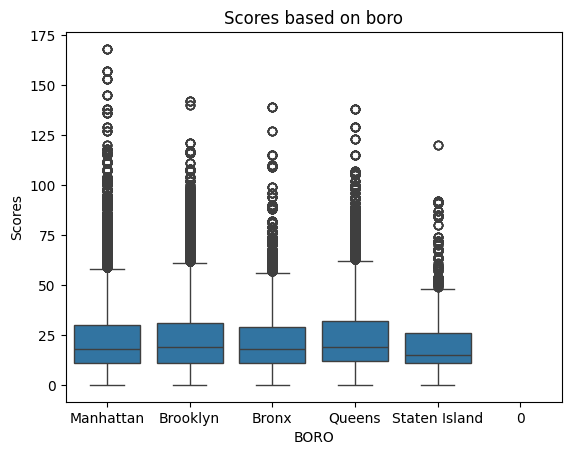

In [29]:
# Score Boxplot
sns.boxplot(x='BORO', y='SCORE', data=inspectionDF)
plt.title('Scores based on boro')
plt.ylabel('Scores')
plt.show()

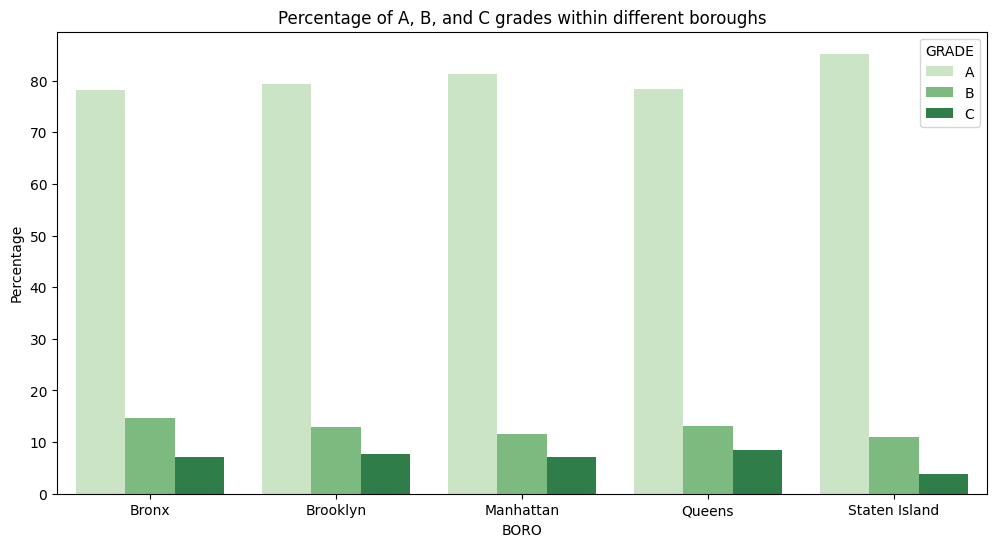

In [30]:
#Just checking for grades A,B,C

# Filter the DataFrame to include only 'A', 'B', and 'C' grades
filtered_df = inspectionDF[inspectionDF['GRADE'].isin(['A', 'B', 'C'])]

f, ax = plt.subplots(figsize=(12, 6))

# Calculate the percentage for each grade within each borough so that
percentage_data = (filtered_df.groupby(['BORO', 'GRADE']).size() / filtered_df.groupby('BORO').size() * 100).reset_index(name='Percentage')

# Create a bar plot with 'BORO' on the x-axis and 'Percentage' on the y-axis
sns.barplot(x='BORO', y='Percentage', hue='GRADE', hue_order=['A', 'B', 'C'],
            data=percentage_data, palette='Greens', ax=ax)

plt.title('Percentage of A, B, and C grades within different boroughs')
plt.ylabel('Percentage')
plt.show()

AttributeError: 'float' object has no attribute 'expandtabs'

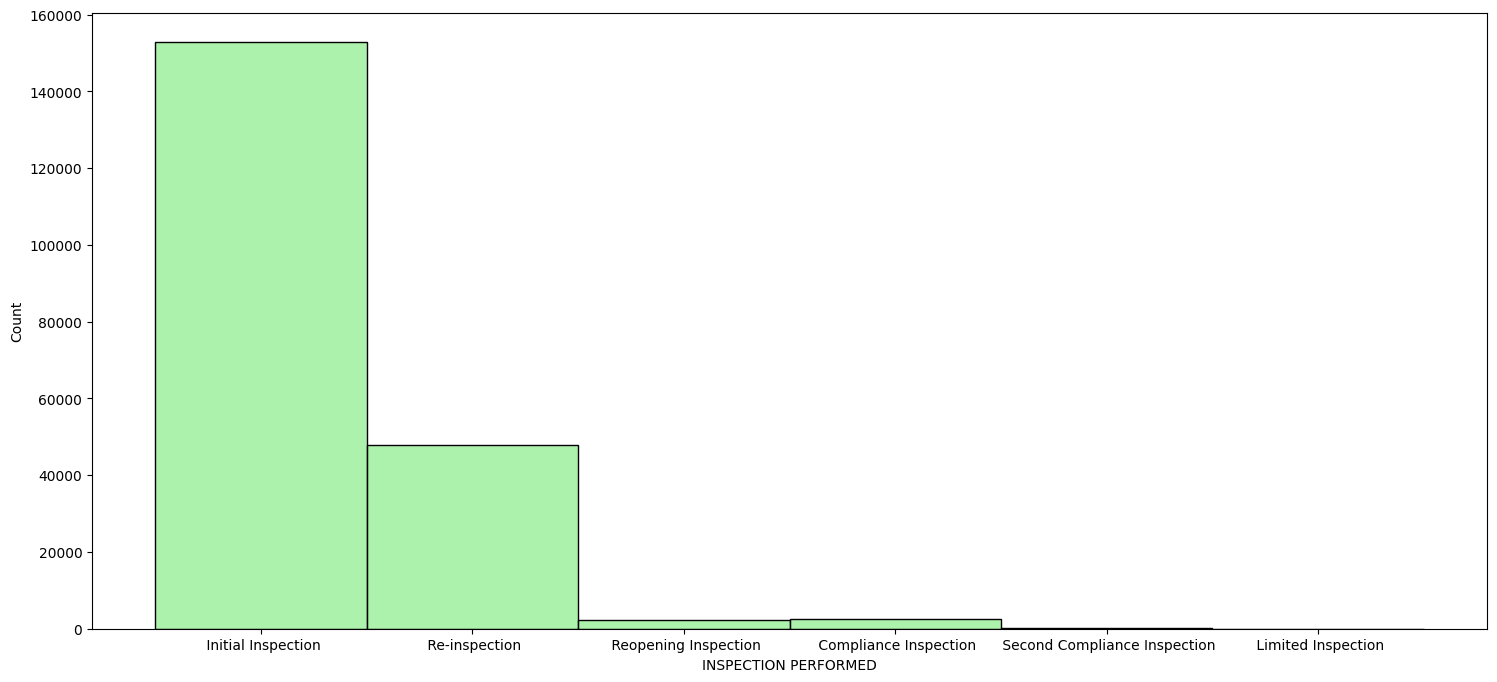

In [31]:
# 4. Top Violations by Code
inspectionDF['VIOLATION CODE'].value_counts()
plt.rcParams["figure.figsize"] = (18,8)
sns.histplot(inspectionDF['INSPECTION PERFORMED'], color="lightgreen")
# Set labels for the x-axis with '\n' and .join
labels = inspectionDF['INSPECTION PERFORMED'].unique()
labels = ['\n'.join(wrap(l,12)) for l in labels]
print(labels)
# Add labels
plt.title("Top Violations by Code")
plt.xlabel("Inspection Performed")
plt.ylabel("Frequency")
plt.xticks([0,1,2,3,4],labels)
# Show the plot
plt.show()

/var/folders/71/v_z1m6m95c709d46xmd64xy80000gn/T/ipykernel_77591/4212035950.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inspectionDF_done['Year'] = inspectionDF_done['INSPECTION DATE'].dt.year


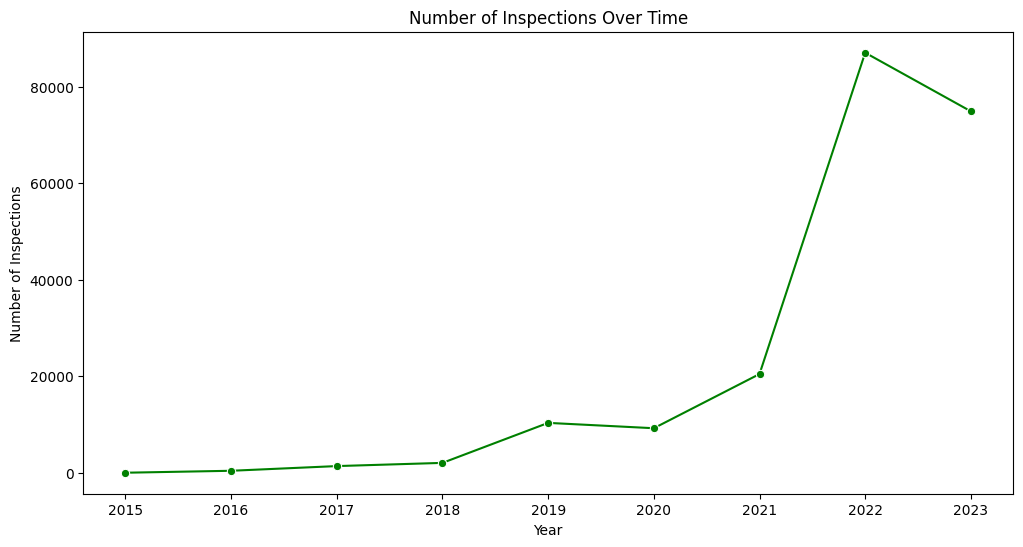

In [32]:
# 3. Time Series Plot
# Assuming inspectionDF['INSPECTION DATE'] is a datetime column
inspectionDF['INSPECTION DATE'] = pd.to_datetime(inspectionDF['INSPECTION DATE'])
# Filter out rows with 'INSPECTION DATE' equal to '1/1/1900'
inspectionDF_done = inspectionDF[inspectionDF['INSPECTION DATE'] != '1900-01-01']
# Extract year from the Inspection Date
inspectionDF_done['Year'] = inspectionDF_done['INSPECTION DATE'].dt.year

# Count the number of inspections per year
inspections_by_year = inspectionDF_done['Year'].value_counts().sort_index().reset_index()
inspections_by_year.columns = ['Year', 'Number of Inspections']

# Set the plot size
plt.rcParams["figure.figsize"] = (12, 6)

# Create a time series plot
sns.lineplot(x='Year', y='Number of Inspections', data=inspections_by_year,
             marker='o', color="green")

# Add labels and title
plt.title("Number of Inspections Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Inspections")

# Show the plot
plt.show()

# K-means Clustering

In [33]:
#converting scores into risk categories

bins = [0, 14, 28, float('inf')]  # Define the bin edges
labels = ['Low Risk', 'Medium Risk', 'High Risk']  # Define the corresponding labels

# Create a new column 'Risk Level' based on the 'SCORE' column
inspectionDF['Risk Level'] = pd.cut(inspectionDF['SCORE'], bins=bins, labels=labels, include_lowest=True)


In [34]:
#Before starting, let's filter the dataset in a way where we aren't using 1/1/1900

# Convert 'INSPECTION DATE' to datetime format
inspectionDF['INSPECTION DATE'] = pd.to_datetime(inspectionDF['INSPECTION DATE'], errors='coerce')

# Filter out rows with 'INSPECTION DATE' equal to '1/1/1900'
inspectionDF_done = inspectionDF[inspectionDF['INSPECTION DATE'] != '1900-01-01']

#checking for null values
inspectionDF_done.isnull().sum()

#dropping the null values 
inspectionDF_done = inspectionDF_done.dropna(subset = 'SCORE')
inspectionDF_done.isnull().sum()

DBA                           0
BORO                          0
STREET                        0
ZIPCODE                       0
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                        0
VIOLATION CODE              647
VIOLATION DESCRIPTION       647
CRITICAL FLAG                 0
SCORE                         0
GRADE                     96227
GRADE DATE               104862
RECORD DATE                   0
INSPECTION TYPE               0
Latitude                    223
Longitude                   223
Franchise                     0
CUISINE CATEGORY              0
INSPECTION PROGRAM            0
INSPECTION PERFORMED          0
Risk Level                    0
dtype: int64

In [ ]:
#Pre-processing data for PCA
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

#lets convert to X and y (target variable)
#X variables - boro, cuisine description, action, critical flag, inspection program, inspection performed, year

X = inspectionDF_done[['BORO', 'CUISINE DESCRIPTION','CRITICAL FLAG', 'ACTION', 'INSPECTION PROGRAM', 'INSPECTION PERFORMED']]
y = inspectionDF_done['SCORE']
y_grade = inspectionDF_done['GRADE']
y_risk = inspectionDF_done['Risk Level']

#Since, we are going to predict the score and grades, that will be our target variable

columns_to_encode = ['BORO', 'CUISINE DESCRIPTION', 'Franchise', 'ACTION', 'INSPECTION PROGRAM', 'INSPECTION PERFORMED']

# Use pandas get_dummies() function for one-hot encoding
X = pd.get_dummies(X, columns=columns_to_encode)

#Displaying the encoded DataFrame
X
#coverting critical flag to numbers - 0-not critical, 1-critical, 2- not applicable

# Assuming 'df' is your DataFrame
critical_flag_mapping = {'Not Critical': 0, 'Critical': 1, 'Not Applicable': 2}

# Use the map function to replace values in the 'critical flag' column
X['CRITICAL FLAG'] = X['CRITICAL FLAG'].map(critical_flag_mapping)


In [ ]:
#now let's create PCA, before that, let's scale the data
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_sc = sc.fit_transform(X)
X_sc

In [ ]:
#lets perform PCA
from sklearn.decomposition import PCA
pca =PCA()
X_pca = pca.fit_transform(X_sc)


In [ ]:
#plotting the PCA graph
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_risk, s=30)
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
#let's perform clustering now. To do so, let's evaluate the best number of cluster using elbow method

#lets find the inertia
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_pca)
                for k in range(1, 12)]
inertias = [model.inertia_ for model in kmeans_per_k]

#lets use elbow meethod to see how many clusters do we require

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 12), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.show()


In [ ]:
# from sklearn.metrics import silhouette_score

# from joblib import Parallel, delayed

# silhouette_scores = Parallel(n_jobs=-1)(
#     delayed(silhouette_score)(X_pca, model.labels_) for model in kmeans_per_k[1:]
# )

# silhouette_scores = [silhouette_score(X_pca, model.labels_) for model in kmeans_per_k[1:]]  # Exclude k=1

# plt.figure(figsize=(8, 3.5))
# plt.plot(range(2, 20), silhouette_scores, "bo-")
# plt.xlabel("$k$", fontsize=14)
# plt.ylabel("Silhouette Score", fontsize=14)

# plt.show()

#was taking too long to run this and my laptop restarted so going to try taking a sample to find the silhoutte score 

In [ ]:
import random
from sklearn.metrics import silhouette_score


sample_indices = random.sample(range(len(X_pca)), min(1000, len(X_pca)))
X_pca_sampled = X_pca[sample_indices]
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_pca_sampled)
                for k in range(1, 20)]
silhouette_scores = [silhouette_score(X_pca_sampled, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)

plt.show()

In [ ]:
#lets take k as 9 based on the sample silhoutte score 

kmeans = KMeans(n_clusters = 9,random_state = 42)
kmeans.fit(X_pca)
pred = kmeans.predict(X_pca)

In [ ]:
#plotting
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue = pred, palette='rainbow', s=30)

In [ ]:
inspectionDF_done['Cluster'] = kmeans.labels_

In [ ]:
inspectionDF_done['SCORE']
inspectionDF_done_sorted = inspectionDF_done.sort_values(by='SCORE', ascending=False)

# Display the sorted DataFrame
inspectionDF_done_sorted.head(100)
#inspectionDF_done_sorted.tail(100)


In [ ]:
#checking risk categories

low_risk = inspectionDF_done[inspectionDF_done['Risk Level'] == 'Low Risk']
medium_risk = inspectionDF_done[inspectionDF_done['Risk Level'] == 'Medium Risk']
high_risk = inspectionDF_done[inspectionDF_done['Risk Level'] == 'High Risk']

print("Low-risk cluster count: \n", low_risk['Cluster'].value_counts())
print("\n Medium-risk cluster count: \n", medium_risk['Cluster'].value_counts())
print("\n High-risk cluster count: \n", high_risk['Cluster'].value_counts())

In [ ]:
numerical_features = inspectionDF_done.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=inspectionDF_done)
    plt.title(f'Feature Analysis for {feature}')
    plt.show()

In [ ]:
#lets try using the scores
#plotting the PCA graph
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y ,palette = 'rainbow', s=30)
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
#lets take k as 9 to try

kmeans = KMeans(n_clusters = 9,random_state = 42)
kmeans.fit(X_pca)
pred = kmeans.predict(X_pca)

In [ ]:
inspectionDF_done['Cluster'] = kmeans.labels_

In [ ]:
cluster0 = inspectionDF_done[inspectionDF_done['Cluster'] == 0 ]
cluster1 = inspectionDF_done[inspectionDF_done['Cluster'] == 1 ]
cluster2 = inspectionDF_done[inspectionDF_done['Cluster'] == 2 ]
cluster3 = inspectionDF_done[inspectionDF_done['Cluster'] == 3 ]
cluster4 = inspectionDF_done[inspectionDF_done['Cluster'] == 4 ]
cluster5 = inspectionDF_done[inspectionDF_done['Cluster'] == 5 ]
cluster6 = inspectionDF_done[inspectionDF_done['Cluster'] == 6 ]
cluster7 = inspectionDF_done[inspectionDF_done['Cluster'] == 7 ]
cluster8 = inspectionDF_done[inspectionDF_done['Cluster'] == 8 ]

print('Cluster 0 average score:', cluster0['SCORE'].mean())
print('\n Cluster 1 average score:', cluster1['SCORE'].mean())
print('\n Cluster 2 average score:', cluster2['SCORE'].mean())
print('\n Cluster 3 average score:', cluster3['SCORE'].mean())
print('\n Cluster 4 average score:', cluster4['SCORE'].mean())
print('\n Cluster 5 average score:', cluster5['SCORE'].mean())
print('\n Cluster 6 average score:', cluster6['SCORE'].mean())
print('\n Cluster 7 average score:', cluster7['SCORE'].mean())
print('\n Cluster 8 average score:', cluster8['SCORE'].mean())

In [ ]:
# Feature analysis for numerical features
numerical_features = inspectionDF_done.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=inspectionDF_done)
    plt.title(f'Feature Analysis for {feature}')
    plt.show()



In [ ]:
#let's try predicting for the restaurants that are not graded yet 

inspectionDF_NG = inspectionDF[inspectionDF['INSPECTION DATE'] == '1900-01-01']

#lets convert to X and y (target variable)
#X variables - boro, cuisine description, action, critical flag, inspection program, inspection performed, year

X = inspectionDF_NG[['BORO', 'CUISINE DESCRIPTION', 'CRITICAL FLAG', 'ACTION', 'INSPECTION PROGRAM', 'INSPECTION PERFORMED']]
y = inspectionDF_NG['SCORE']
y_grade = inspectionDF_done['GRADE']

#Since, we are going to predict the score and grades, that will be our target variable

columns_to_encode = ['BORO', 'CUISINE DESCRIPTION', 'ACTION', 'INSPECTION PROGRAM', 'INSPECTION PERFORMED']

# Use pandas get_dummies() function for one-hot encoding
X = pd.get_dummies(X, columns=columns_to_encode)

# Display the encoded DataFrame
X


#coverting critical flag to numbers - 0-not critical, 1-critical, 2- not applicable

# Assuming 'df' is your DataFrame
critical_flag_mapping = {'Not Critical': 0, 'Critical': 1, 'Not Applicable': 2}

# Use the map function to replace values in the 'critical flag' column
X['CRITICAL FLAG'] = X['CRITICAL FLAG'].map(critical_flag_mapping)


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_sc, y_risk, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

#metrics
print("accuracy:", accuracy_score(y_pred,y_test))
print("precision:", precision_score(y_pred, y_test, average='weighted'))
print("recall:", recall_score(y_pred,y_test, average='weighted'))
print("f1score:", f1_score(y_pred,y_test,average='weighted'))


#classification report
from sklearn.metrics import classification_report
print("\n Classification Report: \n \n",classification_report(y_test, y_pred))

#checking confusion matrix of tuned model
confusion_dt = confusion_matrix(y_test,y_pred)
print("\n Confusion Matrix: \n \n",confusion_dt)


In [ ]:
#fine-tuning it 
from sklearn.model_selection import GridSearchCV
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_rf_regressor = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_regressor.predict(X_test)

#metrics
print("accuracy:", accuracy_score(y_pred,y_test))
print("precision:", precision_score(y_pred, y_test, average='weighted'))
print("recall:", recall_score(y_pred,y_test, average='weighted'))
print("f1score:", f1_score(y_pred,y_test,average='weighted'))


#classification report
from sklearn.metrics import classification_report
print("\n Classification Report: \n \n",classification_report(y_test, y_pred))

#checking confusion matrix of tuned model
confusion_dt = confusion_matrix(y_test,y_pred)
print("\n Confusion Matrix: \n \n",confusion_dt)


In [ ]:
#Random forest regressor to predict scores 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the classifier
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')